# The Normal Distribution: Density 

The _Normal_ or _Gaussian_ distribution, also called the _Bell Curve_, has probability density function

$f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi} \sigma} \exp(-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2})$

The _Standard_ Normal has $\mu=0, \sigma=1$, which gives the usual form

$\phi(x) = \frac{1}{\sqrt{2\pi}} \exp(-\frac{1}{2} x^2)$

The variable $\phi$ (phi) is, in some contexts, reserved for use as the standard normal pdf.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

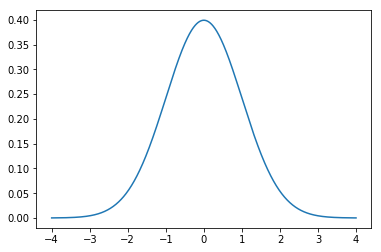

In [9]:
def stdnormpdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-.5 * x**2)

plt.figure()
plt.plot(np.linspace(-4,4, num=1000), stdnormpdf(np.linspace(-4,4, num=1000)))
plt.show()

The mode of the standard normal occurs at 0 (with density equal to $\frac{1}{\sqrt {2\pi} }\approx$

In [10]:
stdnormpdf(0)

0.3989422804014327

The standard normal has inflection points at 1 and -1, and has "thin tails": moving leftwards two units at a time decreases the density by factors

In [17]:
print('0 to -2:', stdnormpdf(0)/stdnormpdf(-2))
print('-2 to -4:', stdnormpdf(-2)/stdnormpdf(-4))
print('-4 to -6:', stdnormpdf(-4)/stdnormpdf(-6))

0 to -2: 7.38905609893
-2 to -4: 403.428793493
-4 to -6: 22026.4657948


so events further than $4\sigma$ away from 0 are incredibly unlikely, which is not true of all distributions. 

# The Normal Distribution: CDF

There is no known closed-form expression for the CDF of a normal distribution. The CDF of a standard normal is equal to

$\Phi(x;\mu,\sigma) = \intop_{z=-\infty}^{x}\frac{1}{\sqrt{2\pi}} \exp(-\frac{1}{2} z^2)$

As in the case of the pdf, $\Phi$ (capital Phi) is often reserved for the standard normal cdf.

Because of its ubiquity in mathematics, most programming languages offer at least a routine to quickly calculate the _Error Function_, 

$\textrm{erf}(x) = \frac{2}{\pi} \intop_{0}^{x} \exp(-z^2)$

If this routine is available, the relationship

$\Phi(x) = \frac{1}{2} + \frac{1}{2} \textrm{erf}(\frac{x}{\sqrt{2}})$

can be used to approximate the standard normal CDF even if no specialized routines are available. Usually there are those routines, however, e.g.

In [18]:
from scipy.stats import norm

In [19]:
norm.cdf(1.1)

0.86433393905361733

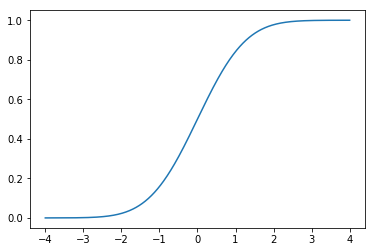

In [22]:
plt.figure()
plt.plot(np.linspace(-4,4,num=500), norm.cdf(np.linspace(-4,4,num=500)))
plt.show()

The CDF is of course symmetric around 0 and continuous everywhere.

There are an incredible number of algorithms to calculate the normal CDF or error function, we will not investigate these deeply but see https://en.wikipedia.org/wiki/Normal_distribution#Numerical_approximations_for_the_normal_CDF for more discussion. One simple example taken from the link is the approximation

$\Phi(x) \approx 1 - \phi(x)(b_1 t + b_2 t^2 + b_3 t^3 + b_4 t^4 + b_5 t^5)$ 

for $\phi$ the standard normal pdf, $t=\frac{1}{1+b_0 x}$ and $b_0 = 0.2316419, b_1 = 0.319381530, b_2 = −0.356563782, b_3 = 1.781477937, b_4 = −1.821255978, b_5 = 1.330274429.$ 

Again, in practice we would hardly ever be required to directly calculate these approximations.

# The Multivariate Normal

We say the rv _X_ is _Multivariate Normal_ if $X\in\mathbb{R}^n$ and the density of _X_ is

$f(x;\mu,\sigma) =\sqrt{(2\pi)^n \vert\Sigma\vert}^{-1} \exp(-\frac{1}{2} (x-\mu)^\prime\Sigma^{-1}(x-\mu))$

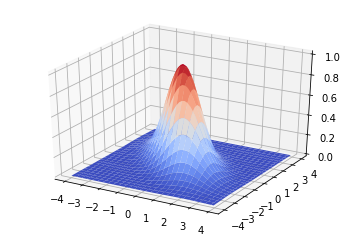

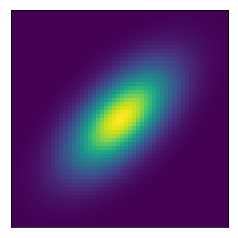

In [20]:
# source: https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
# Not scaled correctly
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
X0 = np.arange(-4, 4, 0.15)
Y0 = np.arange(-4, 4, 0.15)
X, Y = np.meshgrid(X0, Y0)
Z = np.exp(-.5*(X**2 + 2 * .6 * X * Y + Y**2))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0)
ax.set_zlim(0, 1.01)
plt.figure()
plt.imshow(Z)
plt.xticks([])
plt.yticks([])
plt.show()

The matrix $\Sigma$, a positive semi-definite matrix, is called the _variance/covariance_ matrix of X, and summarizes both the variance of X and the degree to which realizations of the different components of X are correlated with each other. If $\Sigma=I$ and $\mu=0$ we of course have the _standard_ multivariate normal.

Generating from the multivariate normal with any covariance matrix is easy due to the relationship

$\textrm{Var}(AX) = A \textrm{Var}(X) A^\prime$

for a fixed matrix A and a random vector X. 

To generate $X\sim\textrm{N}(\mu,\Sigma)$, we use the _Cholesky decomposition_ of $\Sigma$, the unique matrix such that any positive definite matrix can be written 
$A = C C^\prime$. With access to a univariate normal generator:

1. Generate $n$ independent draws of a standard normal from the univariate normal generator; call this $Z_{i}$.
2. Calculate the Cholesky decomposition of $\Sigma$, a standard feature of programming languages; call this $C$.
2. Premultiply the vector $Z_{i}$ by $C$ and add the vector $\mu$ to get $X = \mu + CZ$.

The variance of $X = \mu + CZ$ is $\textrm{Var}(X) = C\textrm{Var(Z)}C^\prime=CIC^\prime=\Sigma$ as desired.